# LEADING Boot-Camp<br>Session 11: Graph/Network Models

## Preface
This is a Jupyter notebook, which is an enhanced format that blends a capacity for computation and mathematical typesetting. You might be reading it rendered, e.g., into an html format&mdash;if you've never operated a Jupyter notebook before and do not have a configured Jupyter environment, you can quickly get started by copying [this Chapter to your own Google Drive](https://drive.google.com/file/d/1UfC6TAoPJCG4_AoncHCE2i3V5YcMjFQD/view?usp=sharing), and reviewing our Pre-Camp's [Preamble](https://drive.google.com/file/d/12_Kl7bSg0fkI7wnCxOr7y7bZ-eRrnYu1/view?usp=sharing), which discusses how to get started with Jupyter notebooks on Google Colab (or your own machine). 

But to review, __the code contained in this notebook will only work...__

1. __... on your own machine (e.g., laptop) if:__ 
- you have installed a Jupyter notebooks environment (see below in this [Preamble](https://drive.google.com/file/d/12_Kl7bSg0fkI7wnCxOr7y7bZ-eRrnYu1/view?usp=sharing)) copied this notebook and its adjacent `'./data/'` directory&mdash;including the packaged data files&mdash;such that everything is in the correct relative location.

2. __... on Google Colab if:__
  - you have done everying to ensure the relative directory structure from (1) above is in place on _your own Google Drive_, _and_ you have filled out and executed the below authentication (also discussed below in this [Preamble](https://drive.google.com/file/d/12_Kl7bSg0fkI7wnCxOr7y7bZ-eRrnYu1/view?usp=sharing)):
> ```
from google.colab import drive
drive.mount('/content/gdrive')
nbdir = "/content/gdrive/My Drive/path/to/this/notebook/"
```
  - as well as the following directory-change step (which must be specified to the naming conventions of _your_ Google Drive):
> ```
%cd /content/gdrive/My\ Drive/path/to/this/notebook/
```

## 11.0 Graphs and Networks
Regardless of what you call them, graphs/networks are a connective modeling framework that use linear algebra heavily. They allow one to measure pairwise comparisons between variables in a holistic context, and e.g., can provide insight into when some variables are not contributing much information. Since networks are often interchangably called graphs, there are often different terminologies for the same concepts, e.g., 'nodes' vs. 'vertice'. But intuitively, networks/graphs model relationships between entities, such as: who's friends with whom? You've probably seen them before depicted as ball-and-stick diagrams and referred to as social networks:

![social-network](https://gatton.uky.edu/sites/default/files/iStock-networkWEB.png)

even though the social kinds are really just data/model-specific applications of the graph/network framework, in general.

### 11.0.1 Defining networks: Links (Edges) and Nodes (Vertices)

To define a network you have to keep track of two different collections: nodes and links (which are also referred to as $\mathcal{V}$ertices and $\mathcal{E}$dges, respectively, in the graph vernacular). We'll refer to these by the former names for their intuitiveness. The nodes (i.e., balls) are the entities, e.g., people in a social network, and are represented by a set of unique identifiers:
$$\mathcal{V} = \{A, B, C, D, E, F, G\}.$$

With a set of nodes, a network's links are then described by a set of pairs of nodes. The order in which the nodes are listed in each pair can indicate the link's direction:
$$\mathcal{E} = \{AF, BE, CB, CD, DE, EB, EG, FE, GA\}.$$

## 11.1 Representing networks
Here, we'll talk about how we can put network data into standard formats so we can work with them computationally.



### 11.1.1 Adjacency matrices
To represent a network in a computer, we can use a square matrix called an _adjacency matrix_. Think of it as having the names of the nodes along the rows and the columns to store the existence of a link pointing from node $X$ to $Y$ by a non-zero entry in row $X$, column $Y$. So, continuing with our example above we would have the adjacency matrix:

$$ \begin{matrix} & A & B & C & D & E & F & G \\ A & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ B & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ C & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\ D & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ E & 0 & 1 & 0 & 0 & 0 & 0 & 1 \\ F & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ G & 1 & 0 & 0 & 0 & 0 & 0 & 0 \end{matrix} $$

We can store this easily in Python by using a numpy array and take row and column sums to see which nodes have the most incoming and outgoing links:

In [1]:
import numpy as np

## Store our network in an adjacency matrix
adj = np.array([
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 1, 0, 0, 0, 0, 0, 0]
])

## find the outgoing numbers of links (axis = 1)
## a.k.a., the row sums
print(np.sum(adj, axis = 1), '\n')

## find the incoming numbers of links (axis = 0)
## a.k.a., the column sums
print(np.sum(adj, axis = 0), '\n')

[1 1 2 1 2 1 1] 

[1 2 0 1 3 1 1] 



### 11.1.2 Adjacency lists
Actually, there's a lot of unnecessary data here in the adjacency matrix picture. While the adjacency matrix is the mathematical way in which a network is represented and operated on, it wastes a lot of storage space (on the computer). Since many networks are _sparse_, or only have a few links relative to the total number that are possible, it is often much more efficent to create adjacency lists, which represent links as either incoming or outgoing only. For simplicity, let's create one for the outgoing links. This technically is all that is needed to represent the entire network. Here's a good question and exercise:

+ What does it take to create an incoming adjacency list?

In [2]:
## Store our network in an outgoing adjacency list
adj_list = {
    "A": ["G"],
    "B": ["E"],
    "C": ["B", "D"],
    "D": ["E"],
    "E": ["B", "G"],
    "F": ["E"],
    "G": ["A"]
}

## check out Cs outgoing links
print("C's number of outgoing links:", len(adj_list["C"]))

C's number of outgoing links: 2


## 11.1.3 Managing network data 

Managing network data can be a lot of work, whether using ordered and/ora associative structures. So, instead of dealing with our own home-built data structures for networks, we should really be using the modules that have been built to handle networks in Python. These work a lot like `PIL` handles images for Python; the main one that we'll be using is called `NetworkX`.



### 11.1.3.1 Building networks with `NetworkX`
Here's how we build a `G`raph from the ground up using `NetworkX`, adding nodes and links one or more at a time. Here's the links again for reference:

$$\mathcal{E} = \{AF, BE, CB, CD, DE, EB, EG, FE, GA\}.$$

In [3]:
import networkx as nx

## initialize our network
G = nx.DiGraph()

## add one node at a time
G.add_node("A")

## add the rest of the nodes at once
G.add_nodes_from(["B","C","D","F","G"])

## add one edge at a time
G.add_edge("A","F")

## add links all at once
G.add_edges_from([("E", "B"),("B", "E"),("C", "B"),
                  ("C", "D"),("D", "E"),("E", "B"),
                  ("E", "G"),("F", "E"),("G", "A")])

## if we want back an adjacency matrix
print(nx.to_numpy_matrix(G))

## if we want back our outgoing adjacency list
print(nx.to_dict_of_lists(G))



[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]]
{'A': ['F'], 'B': ['E'], 'C': ['B', 'D'], 'D': ['E'], 'F': ['E'], 'G': ['A'], 'E': ['B', 'G']}


Supposing we to use the 'same' 5 nodes (they're just labels), we can see how the $0$s, $1$s change in the Graph's numpy matrix.

In [4]:
## initialize our network
G = nx.DiGraph()

## add the rest of the nodes at once
G.add_nodes_from(["A", "B","C","D","E"])

## add links all at once
G.add_edges_from([("A", "B"),("A", "D"),("C", "B"),
                  ("C", "C"),("C", "D"),("C", "E"),
                  ("E", "E")])

## if we want back an adjacency matrix
print(nx.to_numpy_matrix(G))

## if we want back our outgoing adjacency list
print(nx.to_dict_of_lists(G))

## code here

[[0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]
{'A': ['B', 'D'], 'B': [], 'C': ['B', 'C', 'D', 'E'], 'D': [], 'E': ['E']}


#### 11.1.3.2 Directed vs. undirected networks
So far, we've been saying things like: "A links points from $X$ to $Y$.", but this is only meaningful when defining _directed_ networks. The other concept that exists is the notion of an undirected network, where any link/relationship is reciprocal. For an undirected graph, its adjacency matrix is symmetric, so if $X$ links to $Y$, $Y$ links to $X$. In this case, our adjacency matrix would be:

 $$ \begin{matrix} & A & B & C & D & E & F & G \\ A & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\ B & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\ C & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\ D & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\ E & 0 & 1 & 0 & 1 & 0 & 1 & 1 \\ F & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\ G & 1 & 0 & 0 & 0 & 1 & 0 & 0 \end{matrix} $$
 
However, one can just think of all networks as directed, since any directed network can be turned into an undirected network (like we just did above), and any undirected network can be built from directed links. This makes the directed networks' framework slightly more general. You can easily turn a directed graph into an undirected one with `NetworkX`, too:

In [5]:
## Turn our directed network into an undirected network
G_undirected = nx.Graph(G)

## check out the adjacency matrix of our undirected network
nx.to_numpy_matrix(G_undirected)

matrix([[0., 1., 0., 1., 0.],
        [1., 0., 1., 0., 0.],
        [0., 1., 1., 1., 1.],
        [1., 0., 1., 0., 0.],
        [0., 0., 1., 0., 1.]])

#### 11.1.3.3 Weighted vs unweighted graphs

Another generalization of networks is link _weighting_. In this case, not all links are created equally. One relationship might be stronger than another, which can be encoded by a variable number in each position of the adjacency matrix. So, here's a weighting of our original network:

 $$ \begin{matrix} & A & B & C & D & E & F & G \\ A & 0 & 0 & 0 & 0 & 0 & 0.1 & 0 \\ B & 0 & 0 & 0 & 0 & 2 & 0 & 0 \\ C & 0 & 10 & 0 & 1 & 0 & 0 & 0 \\ D & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ E & 0 & 3 & 0 & 0 & 0 & 0 & 1 \\ F & 0 & 0 & 0 & 0 & 0.5 & 0 & 0 \\ G & 4 & 0 & 0 & 0 & 0 & 0 & 0 \end{matrix} $$
 
we can adjust link weights in `NetworkX` as follows:

In [6]:
## initialize our network
G = nx.DiGraph()

## add nodes all at once
G.add_nodes_from(["A", "B", "C", "D", "F", "G"])

## add a single weighted edge
G.add_edge("A", "F", weight = 0.1)

## add the remaining links all at once
G.add_weighted_edges_from(
    [("B", "E", 2),("C", "B", 10),("C", "D", 1),("D", "E", 1),("E", "B", 3),("E", "G",1),("F", "E", 0.5),("G", "A", 4)]
)

## if we want back an adjacency matrix
print(nx.to_numpy_matrix(G))

[[ 0.   0.   0.   0.   0.1  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   2. ]
 [ 0.  10.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   0.   0.   0.   0.5]
 [ 4.   0.   0.   0.   0.   0.   0. ]
 [ 0.   3.   0.   0.   0.   1.   0. ]]


### 11.1.4 Visualizing Networks: Hairballs

Going back to the motivational picture: 

![social-network](https://gatton.uky.edu/sites/default/files/iStock-networkWEB.png)

you might be interested to make your own network visualizations! Well let's take a moment to think about this before we play with visualization. Here's the problem: just like the binning of a histogram is a relatively arbitrary thing to decide, so is the _layout_ of a network. By layout, we mean where the balls are located relative to one another. As a result, a number of different layout schemes have been created to incorporate things like weighting and density of linking. 



#### 11.1.4.1 Visualization with `NetworkX`
Here's the basic drawing capacity for `NetworkX`, and for fun, a way to bring your favorite network data in _from_ a `NumPy` array (adjacency matrix). You should ask youself: "What are those funny collars on the links?" Arrows, direction!

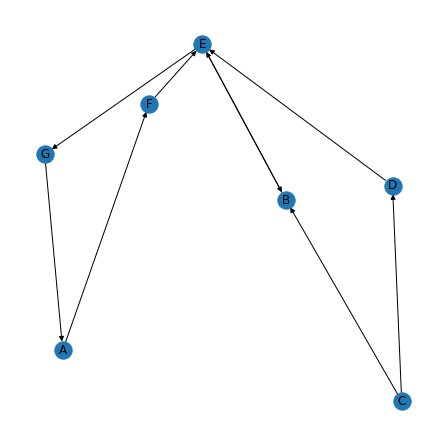

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt

## our network as an adjacency matrix
adj = np.array([
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 1, 0, 0, 0, 0, 0, 0]
])

## the names of our nodes
names = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G"
}

## bringing our adjacency matrix into networkX
G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())

## adding in the node labels
G = nx.relabel_nodes(G,names)

## make our figure a nice size (using matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(G, with_labels = True)

#### 11.1.4.2 Layouts
That was the default, _spring_ layout. It's probably called the spring layout because the nodes push apart from one another. However, there's also some randomness built into, i.e., if we run the same plot again we'll get a different picture! To emphasize just how different network visualizations can be, here's the circular layout:

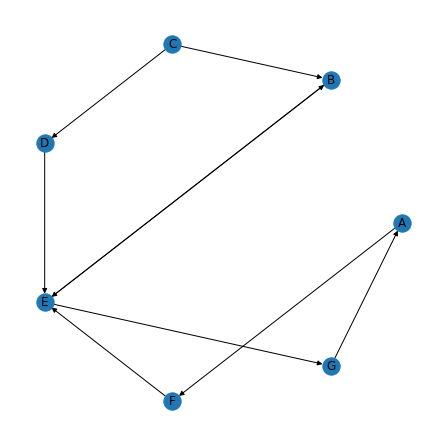

In [8]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(G, with_labels = True, pos = nx.circular_layout(G))

The spring layout is a bit more common, but just for fun here's a crazy one. If you're curious, this one works to
> Position nodes using the eigenvectors of the graph Laplacian.

or in other words, the adjacency matrix eigenvectors&mdash;more linear algebra!

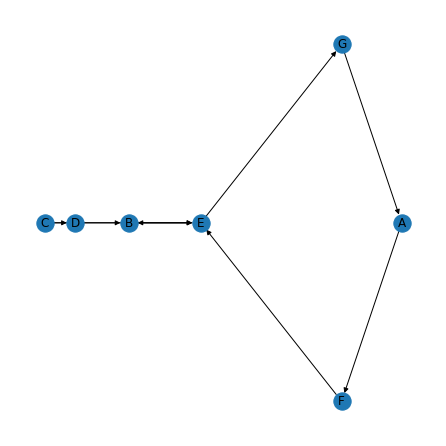

In [9]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(G, with_labels = True, pos = nx.spectral_layout(G))

To continue to explore, we can visualize a arbitrary networks with different or just the default '[spring](https://networkx.org/documentation/networkx-2.5/reference/generated/networkx.drawing.nx_pylab.draw_networkx.html#networkx.drawing.nx_pylab.draw_networkx)' layout:

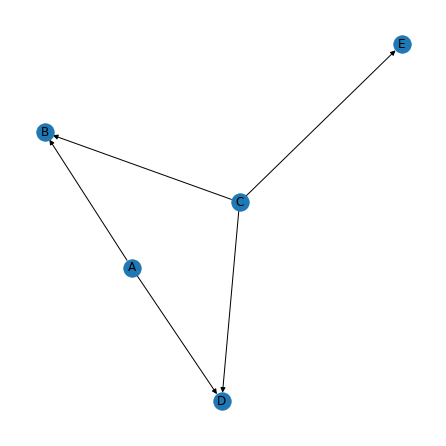

In [10]:
H = nx.DiGraph()

## add the rest of the nodes at once
H.add_nodes_from(["A", "B","C","D","E"])

## add links all at once
H.add_edges_from([("A", "B"),("A", "D"),("C", "B"),
                  ("C", "C"),("C", "D"),("C", "E"),
                  ("E", "E")])

## make our figure a nice size (using matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(H, with_labels = True)

#### 11.1.4.3 Hairballs
The real problem with network visualization is that you can't tell what's going on when a network gets big... i.e., you wind up with a _hairball_. We could go on about how the different layout schemes are ambiguous, but perhaps the real issue is that most interesting networks have a _lot_ of nodes and links. Visualizing in this circumstance almost makes it impossible to tell what's going on, which is why we call them hairballs. Sure, a hairball might _look cool_, but does it actually provide any insight? To see this kind of issue let's look at a real-world social network drawn from the Twitter _platform_ by the Stanford Network Analysis Project (SNAP):
+ https://snap.stanford.edu/data/egonets-Twitter.html

This data set has about 80k nodes and 1.75 million links, so it's pretty big! The way they stored the data is with 1) anonymized IDs, in a simplest-possible space-separated two-column format. This makes it a bit easier to store, but we'll have to use a bit of work to pull it in to `NetworkX`. Note: the file is contained with this lecture in:
+ `./data/twitter_combined.txt`

If you're interested in networks, SNAP has a number of other exampls of networks drawn from different phenomena. Here's the master index:
+ https://snap.stanford.edu/data/

#### 11.1.4.4 Example, loading a network with Python-basic file i/o
First, we have to load the data in. Perhaps to be growable, the network's in a pretty raw format: space-delimited lines of `<sourceID> <targetID>` links (the link list implies the node names. This format actually makes it very easy to   grow/evolve the implied dnetwork over time, and new links may just be appended.

Note: since our goal is to visualize, we'll have to limit this network to just 5000 links!

In [13]:
## we'll need regular expressions to split the columns
import re

big_G = nx.DiGraph()

numlinks = 0

## open the  network file
with open("./data/twitter_combined.txt", "r") as f:
    ## loop over the lines
    for line in f:
        source, target = re.split(" ", line.strip())
        big_G.add_edge(source, target)
        
        numlinks += 1
        if numlinks == 5000:
            break

#### 11.1.4.5 Making a hairball look decent
When a network gets large enough, drawing the labels looks pretty bad, so let's just see what happens when we plot it with no labels.

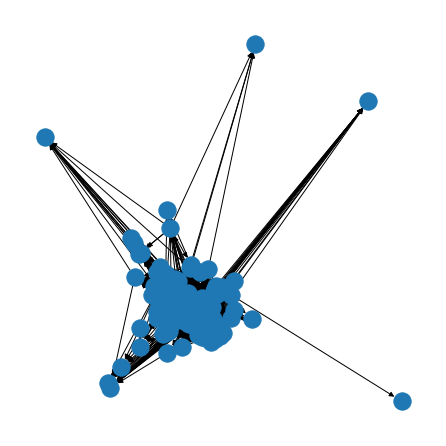

In [14]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network---don't plot the labels!!
nx.draw(big_G, with_labels = False)



As you can see, this still isn't very easy to understand, particularly since the nodes are large, non-transparent, and overlapping. We can make this a bit better by just drawing the network edges.

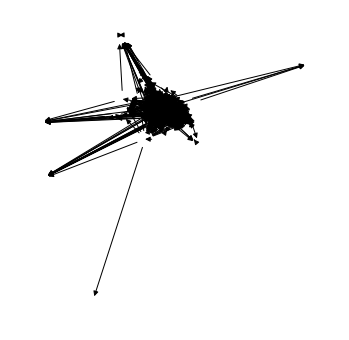

In [15]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network---don't plot the labels!!
_ = nx.draw_networkx_edges(big_G, pos = nx.spring_layout(big_G))

##
_ = plt.axis("off")

Even still, we can't see where these nodes are. So, let's try and at least get at some notion of density with a bit of alpha (transparency).

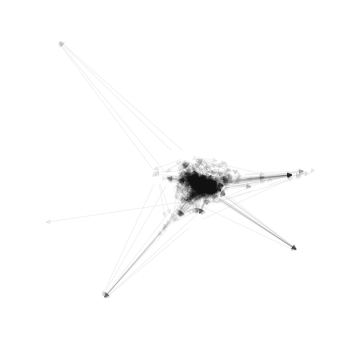

In [16]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network---don't plot the labels!!
_ = nx.draw_networkx_edges(big_G, pos = nx.spring_layout(big_G), alpha = 0.05)

##
_ = plt.axis("off")

## 11.2 Network modeling
While it's great for practice and intuition building, ball-and-stick network visualization is relatively limited in its ability to provide exploratory insight, perhaps most of all because of the ambiguities surrounding layout.  So, if looking at networks is limited, how do we work with them? Well, if you're not getting the picture: networks impose serious computational challenges, and they are difficult to interpret. This is why there's a whole field of study that has opened up around them: network science. This field is much more oriented towards quantitative analysis than visualization. When it comes to exploratory analysis, network _statistics_&mdash;and visualizations of them&mdash;generally provide more insight, and will come up again when we get more into exploratory data analysis (EDA).

But EDA is not the focus of our conversation here. We're interested in understanding how networks can be used as modeling tools, and will do so by discussing one very important networks method for analysis that was designed in one of the first big advances of data science: Google's web search.

### 11.2.1 Application: Google's web search
Well, we made it. All of this just to tell you how Google works? It's true, Google was okay&mdash;just another web search company&mdash;before they came up with their algorithm that changed things. What's that algorithm?

+ Find the primary eigenvector of a network's inbound transition matrix! 

Ultimately, what Google's _PageRank_ algorithm tells us is the portion of web surfers who will wind up at a web page from clicking their way around the internet: a model for how people behave online.

#### 11.2.1.1 The random websurfer model
The easiest way to start thinking about this has to do with random web surfers. The basic idea that the folks at Google had was that people click on webpages randomly. At whatever webpage they're at, there would be a few links sitting in front of them, and they would choose one, randomly. This idea eventually got dubbed the "random surfer" model. People would just keep clicking, around and around, until eventually, with some fixed probability, they would give up and start all over again from some entirely new page, at random, with some probability—we'll call this give-up-and-start-over probability $\alpha$.

![graph](https://drive.google.com/uc?export=view&id=1HF0qJsAnETfOaFHQhM7EB_uPf50tnlvN)

#### 11.2.1.2 Pages and hyperlinks? Nodes and edges.
This is a networks picture! Perhaps the key insight that they leveraged with this model is the perspective that the world wide web is a directed network of pages connected by hyperlinks. So, the world wide web looks like one giant network to Google. There are huuuge challenges in working with the whole world wide web, but we're not going to worry about that now! Instead, we'll just look at our old example network (from above).



#### 11.2.1.3 Transition matrices
Starting with an adjacency matrix:
$$ A = \begin{bmatrix} a_{1,1} & a_{1,2} & \dots & a_{1,n} \\ a_{2,1} & a_{2,2} & \dots & a_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m,1} & a_{m,2} & \dots & a_{m,n} \end{bmatrix} $$

In [17]:
## our old network as an adjacency matrix
adj = np.array([
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 1, 0, 0, 0, 0, 0, 0]
])

The first thing we need to define is called the _transition matrix_, which is a modification of the adjacency matrix in which each element in a given row is divided by its sum. This means the rows of a transition matrix always add up to 1, and consequently describes the probability that outbound traffic diffuses to adjacent webpages. Note: we'll talk more able forming probabilities from data in future chapters, and for the sake of this chapter take the details for granted. We can still perform the arithmetic!

$$ P = \begin{bmatrix} \frac{a_{1,1}}{\sum{a_{1,j}}} & \frac{a_{1,2}}{\sum{a_{1,j}}} & \dots & \frac{a_{1,n}}{\sum{a_{1,j}}} \\ \frac{a_{2,1}}{\sum{a_{2,j}}} & \frac{a_{2,2}}{\sum{a_{2,j}}} & \dots & \frac{a_{2,n}}{\sum{a_{2,j}}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{a_{n,1}}{\sum{a_{n,j}}} & \frac{a_{n,2}}{\sum{a_{n,j}}} & \dots & \frac{a_{n,n}}{\sum{a_{n,j}}} \end{bmatrix} $$

The individual values, $P_{i,j}$, tell us the probability that a surfer surfs (randomly) away from page $i$ and onto page $j$. To divide by the row sums of $A$ we can use:
+ `np.sum(A, axis = 1)`

then we'll have to take the transpose of this afterwords, to get a column vector that makes sure the rows are divided by their sums. However, this is not something numpy does by default, since vectors are 1-dimensional arrays to numpy, :/. So, we'll have to do a quick list comprehension to build a column vector from a list of 1-element (row-sum) lists:

In [18]:
## make the row sums into a column vector
rowsums = np.array([[x] for x in np.sum(adj, axis = 1)])

print(rowsums, '\n')

## make the transition matrix
P = adj / rowsums
print(P)

[[1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]] 

[[0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]]


#### 11.2.1.4 PageRank is all about _inbound_ traffic
By taking the transpose of this matrix, we swap rows for columns, and then change the interpretation of a given row to be a node's inbound traffic probabilities:

 $$ Q = P^T = \begin{bmatrix} \frac{a_{1,1}}{\sum{a_{1,j}}} & \frac{a_{2,1}}{\sum{a_{2,j}}} & \dots & \frac{a_{n,1}}{\sum{a_{n,j}}} \\ \frac{a_{1,2}}{\sum{a_{1,j}}} & \frac{a_{2,2}}{\sum{a_{2,j}}} & \dots & \frac{a_{n,2}}{\sum{a_{n,j}}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{a_{1,n}}{\sum{a_{1,j}}} & \frac{a_{2,n}}{\sum{a_{2,j}}} & \dots & \frac{a_{n,n}}{\sum{a_{n,j}}} \end{bmatrix} $$
 
In other words, $Q_{i,j}$ tells us about the portion of surfers from page $j$ arriving at page $i$.

In [19]:
## transpose the transition matrix into the inbound traffic matrix
Q = np.transpose(P)

print(Q)

[[0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  1.  0.  1.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0. ]]


#### 11.2.1.5 Initializing the model
Now it's time to start our surfers off. We'll need a vector, $v$, which has the same dimension of the (rows or columns) of our matrix (network), describing the portion of the websurfer population at each page. To make things simple, the web surfers start out equally distributed across all of our web pages. So, for our tiny network of $7$ webpages we'll have $\frac{1}{7}$ of the surfers starting in each spot. In general, this would be:

In [20]:
## one seventh of the surfers start out at each node
v = np.array([1, 1, 1, 1, 1, 1, 1]) / 7
print(v)

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


#### 11.2.1.6 Advancing the model

This is th part where we allow the surfers to all 'click', and ask, where did they wind up? We can figure this out by using our inbound traffic, transition matrix ($Q$), since it tells us about how much traffic lands at each page. How? Matrix times vector! This will produce another (output) vector describing where everyone wound up.

So, to figure out where the volume of surfers wound up after their first click, all we now have to do is multiply (dot product) $Q$ times $v(0)$:

 $$ \begin{align} v(1) = Q\cdot v(0) &= \begin{bmatrix} q_{1,1} & q_{1,2} & \dots & q_{1,n} \\ q_{2,1} & q_{2,2} & \dots & q_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ q_{m,1} & q_{m,2} & \dots & q_{m,n} \end{bmatrix} \cdot \begin{bmatrix} v_{1} \\ v_{2} \\ \vdots \\ v_{n} \end{bmatrix}\\\\ & = \begin{bmatrix} q_{1,1}v_{1} + q_{1,2}v_{2} + \cdots + q_{1,n}v_{n} \\ q_{2,1}v_{1} + q_{2,2}v_{2} + \cdots + q_{2,n}v_{n} \\ \vdots \\ q_{m,1}v_{1} + q_{m,2}v_{2} + \cdots + q_{m,n}v_{n} \end{bmatrix} \end{align} $$
 
This is easy for us to do now with `NumPy`'s inner (dot) product:

In [21]:
## to find where the surfers will wind up after clicking
## simply take the dot product
print(Q.dot(v))

[0.14285714 0.14285714 0.         0.07142857 0.42857143 0.14285714
 0.07142857]


#### 11.2.1.7 So, where did all of the surfers go?
Nobody wound up at $C$! That's because there's no way to get to $C$. If it's hard to see from $v(1)$, we can get a view from our visualization, since this is a small (toy) network:

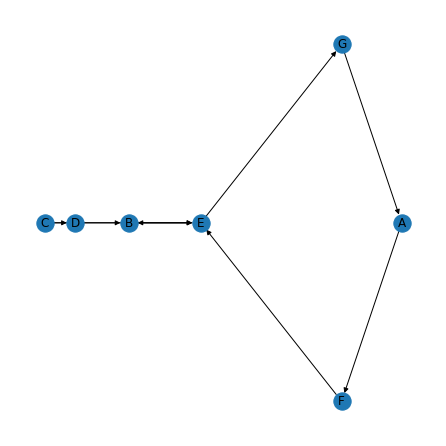

In [22]:
## the names of our nodes
names = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"}

## bringing our adjacency matrix into networkX
G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())

## adding in the node labels
G = nx.relabel_nodes(G, names)

## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6, 6))

## draw our network
nx.draw(G, with_labels = True, pos = nx.spectral_layout(G))



#### 11.2.1.8 While linking is important, it's not (can't be) the whole PageRank story
According to our model description, some of the surfers should give up and visit a random page. This would be entirely how $C$ should get visits, so how do we incorporate the behavior?

It turns out we haven't accounted for this yet. Remember, we were going to call this give up probability $\alpha$. Let's do what most other folks do and choose $\alpha = 0.15$. This means that $\frac{\alpha}{n}$ of the surfers will wind up at $C$ or any other node, and that there's only a probability of $1 - \alpha = 0.85$ that any surfer will surf by clicking. Putting this together, we have:

 $$ 
 \begin{align} 
 v(1) &= \frac{\alpha}{n} + (1 - \alpha)Q\cdot v(0)\\ 
 &=  \begin{bmatrix} 
\frac{\alpha}{n} \\ 
\frac{\alpha}{n} \\ 
 \vdots \\ 
\frac{\alpha}{n} 
 \end{bmatrix} + 
 (1 - \alpha)
 \begin{bmatrix} 
 q_{1,1} & q_{1,2} & \dots & q_{1,n} \\ 
 q_{2,1} & q_{2,2} & \dots & q_{2,n} \\ 
 \vdots & \vdots & \ddots & \vdots \\ 
 q_{m,1} & q_{m,2} & \dots & q_{m,n} 
 \end{bmatrix} \cdot 
 \begin{bmatrix} 
 v_{1} \\ 
 v_{2} \\ 
 \vdots \\ 
 v_{n} 
 \end{bmatrix}\\\\ 
 & = \begin{bmatrix} 
 \frac{\alpha}{n} + (1 - \alpha)(q_{1,1}v_{1} + q_{1,2}v_{2} + \cdots + q_{1,n}v_{n}) \\ 
 \frac{\alpha}{n} + (1 - \alpha)(q_{2,1}v_{1} + q_{2,2}v_{2} + \cdots + q_{2,n}v_{n}) \\ 
 \vdots \\ 
 \frac{\alpha}{n} + (1 - \alpha)(q_{m,1}v_{1} + q_{m,2}v_{2} + \cdots + q_{m,n}v_{n}) 
 \end{bmatrix}
 \end{align} 
 $$
 
Since this just amounts to a few more pointwise operations—multiplying by and adding in constants—the update procedure is still pretty simple:

In [23]:
## the probability that a surfer gives up and starts over
alpha = 0.15

## find where the surfers will wind up after clicking
## or give up and starting over
print(alpha / 7 + (1 - alpha) * Q.dot(v))



[0.14285714 0.14285714 0.02142857 0.08214286 0.38571429 0.14285714
 0.08214286]


#### 11.2.1.9 So now where did the surfers all go?
Okay, each page is now getting some traffic, but where is this all headed? Well, after all the surfers click or give up & start over, their supposed to just do it all over again! And that's exactly what this PageRank algorithm is all about. The surfers just keep surfing. So, where do they wind up? Well that's the thing—the surfers eventually pile up in a very specific way that stops changing. This should remind us of something&mdash;what do we call a vector that we can multiply by a matrix to get the same vector back? An _eigenvector_, yes! 

The way Google has set up this problem, the sequence:
$$v(0), v(1), v(2), \cdots$$

converges towards a special eigenvector that is guaranteed to exist! They called this vector, $v_\infty$, the PageRank vector, and it actually doesn't take that much looping to get close. Let's look at the first ten values:

In [24]:
## the probability that a surfer gives up and starts over
alpha = 0.15

## the initial distribution of surfers
v = np.array([1, 1, 1, 1, 1, 1, 1]) / 7
print(v, '\n')

## update the surfer locations each time step
## with a matrix multiplication
## a total of 10 time steps
for i in range(10):
    ## updated where the surfers will wind up after clicking
    ## or giving up and starting over
    v = alpha / 7 + (1 - alpha) * Q.dot(v)
    print(v, '\n')

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714] 

[0.14285714 0.14285714 0.02142857 0.08214286 0.38571429 0.14285714
 0.08214286] 

[0.09125    0.19446429 0.02142857 0.03053571 0.33410714 0.14285714
 0.18535714] 

[0.17898214 0.17253125 0.02142857 0.03053571 0.33410714 0.09899107
 0.16342411] 

[0.16033906 0.17253125 0.02142857 0.03053571 0.2781779  0.17356339
 0.16342411] 

[0.16033906 0.14876132 0.02142857 0.03053571 0.34156437 0.15771677
 0.13965418] 

[0.14013462 0.17570057 0.02142857 0.03053571 0.30789031 0.15771677
 0.16659343] 

[0.16303299 0.1613891  0.02142857 0.03053571 0.33078867 0.140543
 0.15228195] 

[0.15086823 0.1711209  0.02142857 0.03053571 0.30402621 0.16000661
 0.16201376] 

[0.15914027 0.15974685 0.02142857 0.03053571 0.32884231 0.14966657
 0.15063971] 

[0.14947233 0.1702937  0.02142857 0.03053571 0.31038534 0.1566978
 0.16118655] 



#### 11.2.1.10 Interpreting and utilizing the output
So, it looks like $C$ and $D$ don't get many surfers, while $E$ winds up with twice as many as it started with!

In fact, we can visualize (since the network is small) this converging balance of page importance, which Google uses to rank the hits it presents to you when you search:

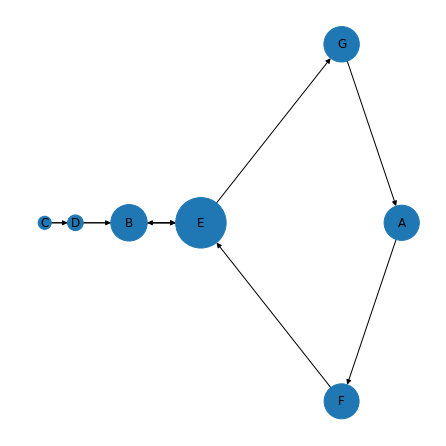

In [25]:
## the probability that a surfer gives up and starts over
alpha = 0.15

## the initial distribution of surfers
v = np.array([1, 1, 1, 1, 1, 1, 1]) / 7

## update the surfer locations each time step
## with a matrix multiplication
## a total of 100 time steps
for i in range(100):
    ## updated where the surfers will wind up after clicking
    ## or giving up and starting over
    v = alpha / 7 + (1 - alpha) * Q.dot(v)

## the names of our nodes
names = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"}

## bringing our adjacency matrix into networkX
G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())

## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6, 6))

## draw our network
nx.draw(G, labels = names, with_labels = True, pos = nx.spectral_layout(G), node_size = v * 8000)

#### 11.2.1.11 Is this really all it is?
So, according to the model, i.e., the network structure _and_ the rules on random web surfing that were put in place, $E$ is the most important node. But this isn't all that Google does to find pages for you. In reality, Google's algorithms takes a lot of different information and pulls it together. This models says what's important about a network's structure. Other stuff has to come in as well, like does the page match the searcher's keywords? 

At this point, Google's search algorithm incorporates a lot of different modeling strategies, but PageRank gave the search giant an early lead that no other really was ever able to make up for. This is in part because Google's strategy was much more advanced than the others of the time, but competition catches up quick, and to stay on top Google had to optimize (and still does) continually. This is where features like search personalization came from!

## 11.3 Exteneded example: Representing a Digital News Network (DNN)

So far, we've defined what networks/graphs are, explored how to represent them in Python, and discussed PageRank, whose application to web-search is perhaps one of the most-impactive uses of graph/network modeling. However, one thing we haven't explored yet is how we can use data science activities&mdash;in particular, pre-processing&mdash;to produce interesting network models.

Here, we'll be working with a sample from a research dataset called _NewsTweet_. This data set follows Google's RSS feed of news articles and accesses and pre-processes them, and as an additional enrichment of the data with social media, accesses and includes embedded social media content. For more details on the NewsTweet project, see this paper: 

- https://arxiv.org/pdf/2008.02870.pdf

In this suite of exercises, we'll focus on representing the DNN underlying Google's feed, where we might think of a DNN as a network of online news sites over which information (i.e., news content) flows. Our general strategy will build off other text analysis and linear algebraic methods to form a pre-processing pipeline.

### 11.3.1 Get to know the data
First, let's load the data in the file:

- `./data/newstweet-subsample-linked.json'`

which is a sample of $1,000$ articles from the NewstTweet collection. We can easily examine the object struture and a few of the articles inside:

In [26]:
import json
newstweet = json.load(open('./data/newstweet-subsample-linked.json'))
newstweet[5]

{'authors': ['Rosemary Rossi',
  'Lindsey Ellefson',
  'Sharon Waxman',
  'Margeaux Sippell'],
 'spans': [],
 'text': "Robert Downey Jr. would rather talk to animals than people as the new Dr. Dolittle. But, as seen this official “Dolittle” trailer released Sunday, he is soon forced to leave his hideaway and set sail across the sea to a mythical island.\n\n“We have no choice but to embark on this perilous journey,” Downey whispers to his feathered and furry friends.\n\nAnd that involves getting into all sorts of dangerous situations, like being chained in a medieval dungeon with a tiger who greets him with, “hello, lunch” and then jumps him. But not to worry — a gorilla voiced by Rami Malek comes to his rescue.\n\nAlso Read: Universal Moves Robert Downey Jr.'s 'Voyage of Doctor Dolittle' to January 2020\n\n“Dolittle” tells the story of famed doctor and veterinarian during the time of Queen Victoria’s England, Dr. John Dolittle, who returns to action after the loss of his wife seven yea

### 11.3.2 Determining a network node set
Using the `'url'` field of our articles, we now need to come away with a unique set of node identifiers. But we can't/should'nt take the url's themselves, as they are uniquely specific to articles, i.e., not the _domains_. So, this is a regular expressions problem where the job is to identify and utilize a pattern (or patterns) to extract a `domain` object for each article and store them in a list called `domains`.

\[Hint. What delimits a URL and where does the domain fall within it?\]

In [27]:
import re
from collections import Counter, defaultdict

domains = [re.split("\/+", x['url'])[1] if len(re.split("\/+", x['url'])) > 1 else x['url'] for x in newstweet]
bad_domains = [x['url'] for x in newstweet if len(re.split("\/+", x['url'])) <= 1]

domain_article_counts = Counter(domains)
domain_article_counts.most_common(25)

[('www.foxnews.com', 45),
 ('www.cnn.com', 35),
 ('www.nytimes.com', 23),
 ('nypost.com', 21),
 ('thehill.com', 21),
 ('www.cnbc.com', 21),
 ('www.reuters.com', 21),
 ('www.espn.com', 17),
 ('www.washingtonpost.com', 15),
 ('www.cbssports.com', 14),
 ('www.nbcnews.com', 14),
 ('www.usatoday.com', 13),
 ('www.dailymail.co.uk', 12),
 ('www.cbsnews.com', 12),
 ('www.yahoo.com', 12),
 ('www.theguardian.com', 11),
 ('www.cnet.com', 11),
 ('news.yahoo.com', 10),
 ('apnews.com', 10),
 ('www.npr.org', 10),
 ('www.engadget.com', 9),
 ('finance.yahoo.com', 8),
 ('www.theverge.com', 8),
 ('www.businessinsider.com', 8),
 ('abcnews.go.com', 8)]

### 11.3.3 Bringing in some more tools from text analysis
While this _isn't_ a text analysis class, if we want to build a network from text-based similarity we'll need a `tokenize()` function that can break our documents into text sequences simply, with regular expressions. While it's not used much, this code uses a another regex-based sentence tokenizer on top. These are useful tools, even outside of this application!

Likewise, we'll need to count up the number of times each word appears in each document, i.e., a term-document-matrix. So we'll also need a function like the below called `make_TDM(documents)`, which accepts a list of string `documents` and several booleans that determine how to weight the words in the documents. The function outputs a tuple of values: `(TDM, word_index)`, the former of which is be the `TDM` and latter a `word_index`, mapping the token-strings to row numbers. 

In [28]:
import scipy as sp

def tokenize(text, space = True):
    tokens = []
    for token in re.split("([0-9a-zA-Z'-]+)", text):
        if not space:
            token = re.sub("[ ]+", "", token)
        if not token:
            continue
        if re.search("[0-9a-zA-Z'-]", token):                    
            tokens.append(token)
        else: 
            tokens.extend(token)
    return tokens

def sentokenize(text, space = True):
    sentences = []
    for sentence in re.split("(\s+(?<=[.?!,;:\n][^a-zA-Z0-9])\s*)", text):
        if (len(sentence)==1 and not re.search("[0-9a-zA-Z'-]", sentence[0])):
            if len(sentences):
                sentences[-1] = sentences[-1] + [sentence]  
            else:
                sentences.append([sentence])
        elif not re.search("[0-9a-zA-Z'-]", sentence):
            tokens = tokenize(sentence, space = space)
            if len(sentences):
                sentences[-1] = sentences[-1] + tokens  
            else:
                sentences.append(tokens)
        else:
            sentences.append(tokenize(sentence, space = space))
    return sentences

def make_TDM(documents, do_tfidf = True, space = True, normalize = True):
    document_frequency = Counter()
    for j, document in enumerate(documents):
        frequency = Counter([t for s in sentokenize(document, space = space) 
                         for t in s])
        document_frequency += Counter(frequency.keys())
    type_index = {t:i for i, t in enumerate(sorted(list(document_frequency.keys())))}
    document_frequency = np.array(list(document_frequency.values()))
    # performs the counting again, and stores with standardized indexing`
    counts, row_ind, col_ind = map(np.array, zip(*[(count, type_index[t],j) 
                                                   for j, document in enumerate(documents) 
                                                   for t, count in Counter(tokenize(document, space = space)).items()]))
    # constructs a sparse TDM from the indexed counts
    TDM = sp.sparse.csr_matrix((counts, (row_ind, col_ind)),
                             shape = (len(document_frequency),len(documents)))
    if normalize:
        # normalize frequency to be probabilistic
        TDM = TDM.multiply(1/TDM.sum(axis = 0))
    # apply tf-idf
    if do_tfidf:
        num_docs = TDM.shape[1]
        IDF = -np.log2(document_frequency/num_docs)
        TDM = (TDM.T.multiply(IDF)).T
    return(TDM.toarray(), type_index)

Note: to simplify computation, the below application lowercases all text.

In [29]:
TDM, word_index = make_TDM([x['text'].lower() for x in newstweet])
TDM.shape, TDM[:5,:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in true_divide


((31980, 960),
 array([[0.17813781, 0.19744339, 0.63874116, 0.10884184, 0.04997554],
        [0.00279504, 0.00265581, 0.00244311, 0.00284627, 0.00273939],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]))

### 11.3.4 An extra-efficient document similarity function
To decide which documents are similar to determine which content publishers are connected in our network, we'll need to build some utility for text-similarity comparison. We can use the document-columns, in our TDM, from the above output.

The function we'll used here is `column_similarity(X, names, p = 90)`, which will accept a matrix `X`, a list of their (non-unique) `names` (for us this will be `domains`) and a percentile `p`.

The `names` object will is used to limit the number of comparisons to only those which are necessary (i.e., those with different `names`). Moreover, since the _cosine similarity_ comparison is symmetric, the function also only compares each pair of columns once (an not again in reversed order).

Finally, to make the function fast, the `p` parameter restricts `X` to the submatrix of rows whose row sums are in the `p`th percentile or above.

As output, this returns a sorted list of `sims`, each of the form: `(similarity_score, col1_idx, col2_idx)`, where `similarity_score` is the result from comparing columns at indices `col1_idx` and `col2_idx`.

In [30]:
def column_similarity(X, names, p = 90):
    row_sums = X.sum(axis = 1)
    mask = row_sums > np.percentile(row_sums, p)
    X = np.array(X[mask,:].T / np.linalg.norm(X[mask,:], axis=0)[:, np.newaxis]).T
    sims = [(X[:,j1].dot(X[:,j2]), j1, j2) 
            for j1 in range(X.shape[1])
            for j2 in range(X.shape[1]) if (j2 > j1) and (names[j1] != names[j2])]

    return sorted(sims, reverse = True)
sims = column_similarity(TDM, domains, 90)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [31]:
sims[:25]

[(0.9001005205532805, 8, 51),
 (0.899385968480418, 156, 888),
 (0.8967171324431614, 7, 951),
 (0.8947907856422984, 8, 951),
 (0.8938611550226141, 42, 531),
 (0.8931851410948212, 121, 290),
 (0.8917692597160926, 121, 734),
 (0.8895699982469835, 8, 532),
 (0.8892841533021107, 282, 531),
 (0.8892407328825712, 8, 548),
 (0.8876976272179891, 4, 770),
 (0.8855399332457545, 8, 641),
 (0.8807647625632209, 120, 936),
 (0.8788367412105019, 7, 641),
 (0.8787967935289034, 121, 407),
 (0.876384081217049, 121, 622),
 (0.8736265040397297, 23, 255),
 (0.8730426722633526, 23, 882),
 (0.8721705805647622, 33, 569),
 (0.8705984095247372, 7, 727),
 (0.8698439238157805, 120, 891),
 (0.8685363016599201, 23, 889),
 (0.8675963863059106, 8, 701),
 (0.8656304962559898, 23, 888),
 (0.8649338708546205, 23, 435)]

### 11.3.5 Yikes, does this do anything useful? (Sanity check)
Let's next review some of the most similar documents output by the similarity function. Do they appear similar? Do they replicate content? What would be a good similarity cutoff to apply to try and reliably restrict to pairs which do share content?

In [32]:
newstweet[8], newstweet[51]

({'authors': ['Aol Staff', 'Alexander Nazaryan', 'Yahoo News'],
  'spans': [],
  'text': "WASHINGTON — Public support for impeachment of President Trump is rising — and so is anxiety among Republicans who worry that the White House has not done enough to coordinate an aggressive response.\n\nThat lack of uniform messaging has led to freelance efforts to help the president, as well as criticism from supporters of the president over what they deem an insufficient strategy to counter Democrats.\n\nOn Thursday afternoon, Sen. Lindsey Graham introduced a Senate resolution to condemn House Democrats for the way they have handled the impeachment inquiry into Trump’s attempts to have the Ukrainian government to investigate the family of his political rival, the former Vice President Joe Biden.\n\nA co-author of the resolution was Senate Majority Leader Mitch McConnell, R-Ky., famous for his ability to count votes and discern shifts in political moods. And yet McConnell was not standing alongsi

### 11.3.6 Refinement to collecting sufficiently similar pairs
Using the similarity output and a `threshold`, we can identify possible content replication events across the compared articles. To do this, we define a default dictionary (of lists) called `connections`. Looping over the `sims`, we can store any pair with score above the `threshold` and store it in the `connections` object to build our network.

In [33]:
threshold = 0.89
connections = defaultdict(list)
for sim, j1, j2 in sims:
    if sim >= threshold:
        if 'Close Get email notifications' in newstweet[j1]['text']: continue
        connections[tuple(sorted((domains[j1], domains[j2])))].append((j1, j2))

### 11.3.7 Build a weighted link list and review the degree distribution
Each element in the connections object represents a `link` in the DNN we're building, and where they pile up we can count (weight) stronger links in the network. In particular, this step stores the strongly-similar content (document) pairs in an object called `weighted_link_list`, which is a list of three-element tuples. The first two elements are again the two `domains` defining the links, and the third element is the `weight`, or, number of replication events (above-threshold similar documents).

Likewise, we'll use the `weighted_link_list` object to build a `Counter` containing the number of links each domain appears in and call this `node_degrees` so that we have access to the [degree distribution](https://en.wikipedia.org/wiki/Degree_distribution).  The _degree distribution_ is the statistical distribution of how 'big' the nodes are, i.e., how many connections they have.

In [34]:
weighted_link_list = sorted([(*link, len(connections[link])) for link in connections],
                            key = lambda x: x[-1], reverse = True)
node_degrees = Counter([name for link in weighted_link_list for name in link[:2]])
len(node_degrees), node_degrees.most_common(10), len(weighted_link_list), weighted_link_list[:10]

(95,
 [('www.si.com', 33),
  ('www.washingtonpost.com', 32),
  ('abcnews.go.com', 30),
  ('www.usatoday.com', 22),
  ('www.jsonline.com', 20),
  ('www.bbc.com', 19),
  ('www.salon.com', 19),
  ('nypost.com', 18),
  ('www.cnn.com', 18),
  ('www.foxnews.com', 18)],
 315,
 [('apnews.com', 'www.washingtonpost.com', 21),
  ('www.reuters.com', 'www.washingtonpost.com', 13),
  ('www.politico.com', 'www.washingtonpost.com', 11),
  ('www.theguardian.com', 'www.washingtonpost.com', 9),
  ('nypost.com', 'www.washingtonpost.com', 8),
  ('www.aljazeera.com', 'www.cnn.com', 8),
  ('nypost.com', 'www.si.com', 8),
  ('www.foxnews.com', 'www.washingtonpost.com', 6),
  ('thehill.com', 'www.washingtonpost.com', 6),
  ('www.nbcnews.com', 'www.washingtonpost.com', 6)])

### 11.3.8 Building the DNN
Now that we have the network data, we can initialize a `.Graph()` network with `nx` and use the `add_weighted_edges_from` method to incorporate our DDN from `weighted_link_list`.

In [35]:
G = nx.Graph()  
G.add_weighted_edges_from(weighted_link_list)

### 11.3.9 Visualizing the DNN
Now that we have our network it would be good to review its structure a bit to verify it's meaningful. Here, we can build another function, this time called `plot_graph(G, labels = False)` to utilize a plotting utilty from [the docs](https://networkx.org/documentation/latest/auto_examples/drawing/plot_weighted_graph.html) to plot a specified graph, `G`, with or without `labels`.

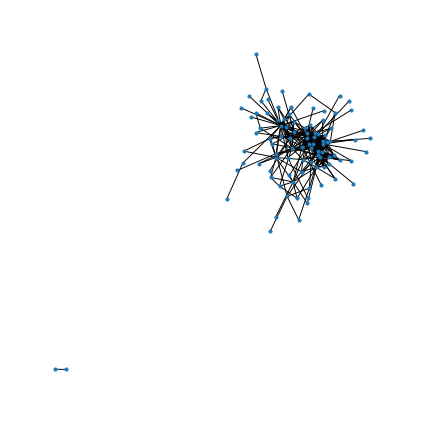

In [36]:
import matplotlib.pyplot as plt

def plot_graph(G, labels = False):
    fig = plt.figure(figsize = (6,6))
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]
    # positions for all nodes - seed for reproducibility
    pos = nx.spring_layout(G, seed=7)  
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=len(G)/10)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=len(G)/100)
    nx.draw_networkx_edges(G, pos, edgelist=esmall, width=len(G)/100, 
                           alpha=0.5, edge_color="b", style="dashed")
    # labels
    if labels:
        nx.draw_networkx_labels(G, pos, font_size=15, font_family="sans-serif")
    ax = plt.gca()
    ax.margins(0.15)
    plt.axis("off")
    plt.tight_layout()
    plt.show()
plot_graph(G)

### 11.3.10 Taking a look at fine-grained structure
Using the `nx.connected_components(G)` and the component-extraction function `G.subgraph(c)`, we can take a look at the first few largest connected components in the DNN by using a sort on the subgraph components by their their length (number of nodes), from high to low. 

Note that the number of components which exists depends on the connectivity of the network, which is either increased or decreased with a lower or higher similarity threshold (respectively). Here's the largest ([giant](https://en.wikipedia.org/wiki/Giant_component)) connected component under the current setting:

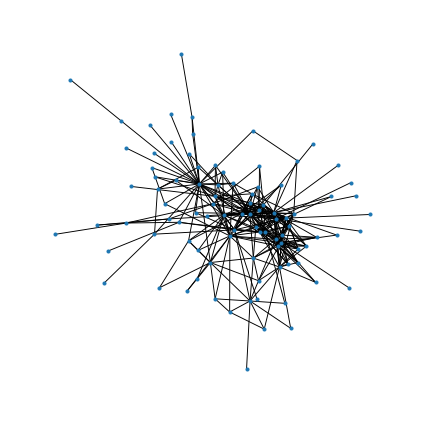

In [37]:
Gc = sorted((G.subgraph(c) for c in nx.connected_components(G)), key=len, reverse = True)[0]
plot_graph(Gc, False)

### 11.3.11 Looking even closer at smaller components
On one that's a bit smaller it's probably safe to plot it's structure with node  labels. This will let us identify a pair in this subgraph and review its content by extracting some corresponding articles' index information through the `connections` object.

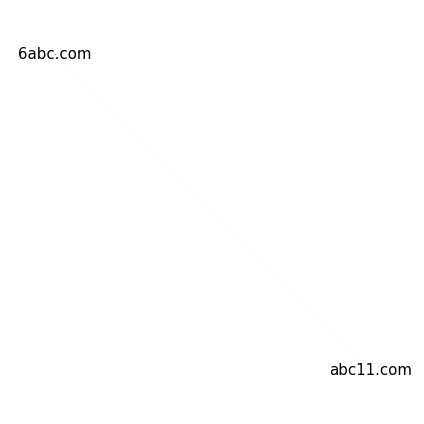

In [38]:
Gc = sorted((G.subgraph(c) for c in nx.connected_components(G)), key=len, reverse = True)[1]
plot_graph(Gc, True)

In [39]:
connections[('6abc.com', 'abc11.com')]

[(453, 688)]

This kind of sanity check is intense, but when we're defining our own networks from scratch is _really_ important to dig deeply and ensure we've meaningfully extracted information from the data!

In [40]:
newstweet[connections[('6abc.com', 'abc11.com')][0][0]], newstweet[connections[('6abc.com', 'abc11.com')][0][1]]

({'authors': [],
  'spans': [],
  'text': 'EMBED >More News Videos The Trump administration has dived back into Capitol Hill\'s confusing COVID-19 negotiations, offering a $916 billion package to House Speaker Nancy Pelosi that adds a $600 direct payment to most Americans.\n\nEMBED >More News Videos Triangle small businesses are contending with increased COVID-19 cases -- causing concerns that customers may stay away or stricter regulations will be implemented right in the heart of the holiday shopping season.\n\nWASHINGTON -- Congressional negotiators are closing in on a $900 billion COVID-19 economic relief package that would deliver additional help to businesses, $300 per week jobless checks, and $600 stimulus payments to most Americans. But there was no deal quite yet.The long-delayed measure was coming together as Capitol Hill combatants finally fashioned difficult compromises, often at the expense of more ambitious Democratic wishes for the legislation, to complete the second maj